In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from numba import njit

# Calculte Energy of site (i,j) Working Good.
@njit
def energy(lattice, i, j, size, J):

    #                               LEFT                         RIGHT                        UP                           DOWN
    energy = - J * lattice[i, j] * (lattice[i, (j - 1) % size] + lattice[i, (j + 1) % size] + lattice[(i - 1) % size, j] + lattice[(i + 1) % size, j])

    return energy

# Monte Carlo Step, Working Good.

@njit
def metropolis(lattice, beta, size, J):

    i = np.random.randint(0, size)
    j = np.random.randint(0, size)

    deltaE = -2 * energy(lattice, i, j, size, J)

    # Change the value of the spin as a function of the energy difference
    if deltaE < 0.0:
        lattice[i,j] *= -1
    elif np.random.random() < np.exp( - deltaE / beta):
        lattice[i,j] *= -1

# Calculate the magnetization of a given spin grid, Working Good

@njit
def magnetization(lattice, size):
    mag = np.sum(lattice) / size**2 # Taille ** 2 = Number of spins
    return np.abs(mag)

# Calculate the magnetic susceptibility for a given evolution of magnetization over time, Working Good.

@njit
def susceptibility(magnetizations, beta, size):
     return size**3 * ( np.mean(magnetizations**2) - np.mean(magnetizations)**2 ) / beta

# Animate the evolution of spin over time, Working Good.


@njit
def cumulant(magnetizations):
     return 1 - ( np.mean(magnetizations**4) / (3 * (np.mean(magnetizations**2))**2) )
 
@njit
def runAnim(lattice, iterations, size, J, beta):
        
    allMag = np.zeros(iterations)
    allEnergy = np.zeros(iterations)
    allGrid = np.zeros((iterations, size, size))

    for i in range (iterations):
        mag = magnetization(lattice, size)
        Energy = 0 

        for j in range (0, size):
            for k in range (0, size):
                Energy += energy(lattice, j, k, size, J) / 2
        
        allMag[i] = mag
        allEnergy[i] = Energy
        allGrid[i] = lattice.copy()
        metropolis(lattice, beta, size, J)
         
    return allMag, allEnergy, allGrid

# Calculate the magnetization after a certain number of MTC Step, Working Good.
@njit
def runMag(lattice, iterations, size, beta, J):
    for i in range (iterations):
        metropolis(lattice, beta, size, J)
    return magnetization(lattice, size)

@njit
def runAll(size, Temp, J, kb):

    allT = np.empty(len(Temp))
    allMag = np.empty(len(Temp))
    allKhi = np.empty(len(Temp))

    for i in range(len(Temp)):
        allT[i] = Temp[i]
        beta = Temp[i] * kb
        print(i)
        np.random.seed(24032003)
        GrilleUp = np.ones((size, size))
        GrilleRandom = np.random.choice(np.array([-1, 1]), size=(size, size))

        tempMagUp = np.empty(0)
        tempMagRandom = np.empty(0)

        tempMagUp = np.append(tempMagUp, magnetization(GrilleUp, size))
        tempMagRandom = np.append(tempMagRandom, magnetization(GrilleRandom, size))
        iterations = 0
        while np.abs(np.mean(tempMagRandom[-50000:]) - np.mean(tempMagUp[-50000:])) > 0.00001:
            iterations += 1
            if iterations >= 1000000:
                print("Maximum iterations reached. Exiting loop.")
                
                break
            metropolis(GrilleUp, beta, size, J)
            metropolis(GrilleRandom, beta, size, J)
            tempMagUp = np.append(tempMagUp, magnetization(GrilleUp, size))
            tempMagRandom = np.append(tempMagRandom, magnetization(GrilleRandom, size))

        meanMag = (np.mean(tempMagRandom[-10000:]) + np.mean(tempMagUp[-10000:]) ) / 2
        allMag[i] = meanMag
        allKhi[i] = susceptibility( tempMagUp, beta, size)

    return allT, allMag, allKhi


In [15]:
kb = 1
Temp = np.array([1.40, 1.50, 1.60, 1.70, 1.80, 1.90, 2.0, 2.05, 2.10, 2.15, 2.20, 2.25, 2.30, 2.35, 2.40, 2.45, 2.50, 2.55, 2.60, 2.70, 2.80, 2.90, 3.00, 3.10, 3.20 ])
J = 1
beta = kb * Temp

size = 5
allT10, allMag10, allKhi10 = runAll(size, Temp, J, kb)

size = 10
allT20, allMag20, allKhi20 = runAll(size, Temp, J, kb)

size = 20
allT30, allMag30, allKhi30 = runAll(size, Temp, J, kb)

size = 30
allT40, allMag40, allKhi40 = runAll(size, Temp, J, kb)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


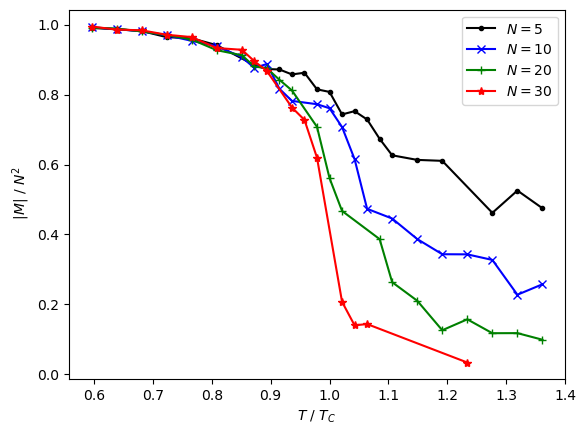

In [24]:
Temp = np.array([1.40, 1.50, 1.60, 1.70, 1.80, 1.90, 2.0, 2.05, 2.10, 2.15, 2.20, 2.25, 2.30, 2.35, 2.40, 2.45, 2.50, 2.55, 2.60, 2.70, 2.80, 2.90, 3.00, 3.10, 3.20 ])

Temp40 = Temp
#allMag40 = np.delete(allMag40, [9, 13, 17, 18, 19, 20, 22, 23, 24])
Temp40 = np.delete(Temp40,[9, 13, 17, 18, 19, 20, 22, 23, 24])

Temp30 = Temp
#allMag30 = np.delete(allMag30, [11, 15,16])
Temp30 = np.delete(Temp30,[11, 15,16])

Temp20 = Temp
#allMag20 = np.delete(allMag20, [11, 17])
Temp20 = np.delete(Temp20,[11, 17])

Temp10 = Temp
#allMag10 = np.delete(allMag10, [6, 21])
Temp10 = np.delete(Temp10,[6, 21])
plt.figure()
plt.plot(Temp10 / 2.35, allMag10, marker=".", color = "black", label= "$N = 5$" )
plt.plot(Temp20 / 2.35, allMag20, marker="x", color = "blue", label= "$N = 10$")
plt.plot(Temp30 / 2.35, allMag30, marker="+", color = "green", label= "$N = 20$")
plt.plot(Temp40 / 2.35, allMag40, marker="*", color = "red", label= "$N = 30$")
plt.legend()
plt.xlabel("$T$ $/$ $T_C$")
plt.ylabel(" |$M$| $/$ $N^2 $")
plt.savefig("out/MagAll.pdf")


In [26]:
print(allMag10)
print(allMag20)
print(allMag30)
print(allMag40)

[0.990656   0.986712   0.981804   0.9643     0.96098    0.94128
 0.884248   0.873076   0.8718     0.857672   0.86247954 0.814972
 0.807668   0.743236   0.752592   0.728836   0.673524   0.62637007
 0.61323762 0.61052632 0.461792   0.52556    0.47487328]
[0.992425   0.987349   0.981052   0.969579   0.953791   0.938284
 0.90721    0.87619    0.887544   0.816566   0.781936   0.772486
 0.760937   0.707166   0.615403   0.47332641 0.445541   0.386862
 0.343435   0.343065   0.327115   0.227603   0.257543  ]
[0.99137175 0.9889835  0.98057825 0.97034225 0.95741675 0.92695275
 0.9125575  0.88041075 0.87515375 0.84232075 0.8118315  0.70769825
 0.56118025 0.4672215  0.38665975 0.26346425 0.2104755  0.126035
 0.157275   0.1175665  0.11777225 0.09892175]
[0.99467678 0.98597911 0.98383922 0.97112744 0.96438411 0.93313722
 0.928148   0.89544333 0.86741378 0.76306344 0.72751567 0.61947678
 0.20731511 0.14010456 0.14367444 0.03372011]


In [6]:

iterations = 5000000
kb = 1
Temp = np.array([1.80, 1.90, 2.0, 2.05, 2.10, 2.15, 2.20, 2.225, 2.25, 2.275, 2.30, 2.325, 2.35, 2.375, 2.40, 2.45, 2.50, 2.55, 2.60, 2.70, 2.80, 2.90, 3.00])
J = 1
beta = Temp * kb

Chi5 = np.zeros(len(Temp))
Chi10 = np.zeros(len(Temp))
Chi20 = np.zeros(len(Temp))
Chi30 = np.zeros(len(Temp))

size = 5

for i in range(1,len(Temp)):

    allMag = np.zeros(iterations)
    print(i)

    np.random.seed(24032003)
    grille = np.ones((size, size))

    for j in range(iterations):
        allMag[j] = magnetization(grille,size)
        metropolis(grille, beta[i-1], size, J)

    Chi5[i-1] = susceptibility(allMag, beta[i-1], size)

size = 10

for i in range(1,len(Temp)):

    allMag = np.zeros(iterations)
    print(i)

    np.random.seed(24032003)
    grille = np.ones((size, size))

    for j in range(iterations):
        allMag[j] = magnetization(grille,size)
        metropolis(grille, beta[i-1], size, J)

    Chi10[i-1] = susceptibility(allMag, beta[i-1], size)

size = 20

for i in range(1,len(Temp)):

    allMag = np.zeros(iterations)
    print(i)

    np.random.seed(24032003)
    grille = np.ones((size, size))

    for j in range(iterations):
        allMag[j] = magnetization(grille,size)
        metropolis(grille, beta[i-1], size, J)

    Chi20[i-1] = susceptibility(allMag, beta[i-1], size)

size = 30

for i in range(1,len(Temp)):

    allMag = np.zeros(iterations)
    print(i)

    np.random.seed(24032003)
    grille = np.ones((size, size))

    for j in range(iterations):
        allMag[j] = magnetization(grille,size)
        metropolis(grille, beta[i-1], size, J)

    Chi30[i-1] = susceptibility(allMag, beta[i-1], size)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


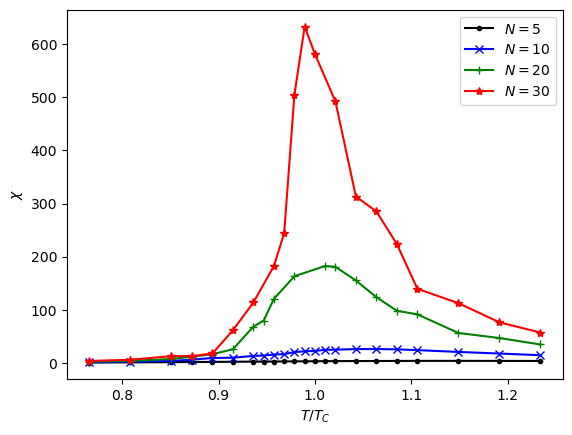

In [19]:
Temp = np.array([1.80, 1.90, 2.0, 2.05, 2.10, 2.15, 2.20, 2.225, 2.25, 2.275, 2.30, 2.325, 2.35, 2.375, 2.40, 2.45, 2.50, 2.55, 2.60, 2.70, 2.80, 2.90, 3.00])

Temp30 = Temp
# Chi30 = np.delete(Chi30, [7,13])
Temp30 = np.delete(Temp30,[7,13])

Temp20 = Temp
# Chi20 = np.delete(Chi20, [9,11,12])
Temp20 = np.delete(Temp20, [9,11,12])

plt.figure()
plt.plot(Temp[:-1] / 2.35, Chi5[:-1] * 25, marker=".", color = "black", label = "$N = 5$" ) 
plt.plot(Temp[:-1] / 2.35, Chi10[:-1] * 100, marker="x", color = "blue", label = "$N = 10$") 
plt.plot(Temp20[:-1] / 2.35, Chi20[:-1] * 400, marker="+", color = "green", label = "$N = 20$") 
plt.plot(Temp30[:-1] / 2.35, Chi30[:-1] * 900, marker="*", color = "red", label = "$N = 30$") 
plt.legend()
plt.xlabel("$T  / T_C $")
plt.ylabel("$ \chi $")
plt.savefig("out/KhiTest.pdf")



In [25]:
print(Chi5[:-1])
print(Chi10[:-1])
print(Chi20[:-1])
print(Chi30[:-1])

[0.0228131  0.03370841 0.05029315 0.05988643 0.07017751 0.08059978
 0.09144686 0.09228965 0.09872947 0.10348986 0.10846085 0.11487368
 0.11842524 0.12287379 0.12843627 0.13356612 0.13778532 0.14241443
 0.14643861 0.14820345 0.14502405 0.13942231]
[0.01136738 0.01953752 0.03704747 0.05808157 0.09144444 0.09614193
 0.13091051 0.13779951 0.15476022 0.16463919 0.20302607 0.21693358
 0.22418581 0.2454178  0.24804726 0.25841871 0.25953786 0.2539753
 0.2389463  0.20527118 0.17469139 0.14371819]
[0.0053428  0.00878832 0.01819614 0.02875409 0.04035137 0.06412415
 0.17060028 0.19889614 0.30135672 0.40771424 0.45608651 0.4520891
 0.38778257 0.30909101 0.24516423 0.22822211 0.14060121 0.11684732
 0.08644503]
[0.00398289 0.00638137 0.01403413 0.0140814  0.01955748 0.06808839
 0.12646755 0.20264016 0.2711055  0.56078968 0.70385068 0.64618155
 0.54716407 0.34809793 0.31681059 0.24836605 0.1549282  0.12490173
 0.08483292 0.06336065]
